# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [9]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [10]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [11]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
409,1,172,68,49,579,42.4,0.702,28,1
150,1,136,74,50,204,37.4,0.399,24,0
595,0,188,82,14,185,32.0,0.682,22,1
96,2,92,62,28,0,31.6,0.130,24,0
305,2,120,76,37,105,39.7,0.215,29,0


In [12]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [13]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [15]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [16]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [17]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary 

In [18]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [19]:

model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6337 - loss: 0.6577 - val_accuracy: 0.6458 - val_loss: 0.6545
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6476 - loss: 0.6528 - val_accuracy: 0.6510 - val_loss: 0.6502
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6510 - loss: 0.6482 - val_accuracy: 0.6667 - val_loss: 0.6461
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6597 - loss: 0.6438 - val_accuracy: 0.6719 - val_loss: 0.6422
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6667 - loss: 0.6396 - val_accuracy: 0.6823 - val_loss: 0.6385
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6771 - loss: 0.6356 - val_accuracy: 0.6927 - val_loss: 0.6350
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6788 - loss: 0.6318 - val_accuracy: 0.6927 - val_loss: 0.6316
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6858 - loss: 0.6281 - val_accuracy: 0.69

In [20]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test)>0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [21]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [22]:
y_pred_prob_nn_1[:10]

array([[0.46740514],
       [0.53372097],
       [0.30666396],
       [0.15370694],
       [0.15810722],
       [0.46036464],
       [0.08368976],
       [0.30051103],
       [0.88007605],
       [0.34335324]], dtype=float32)

Create the plot_roc function

In [23]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.359


roc-auc is 0.819


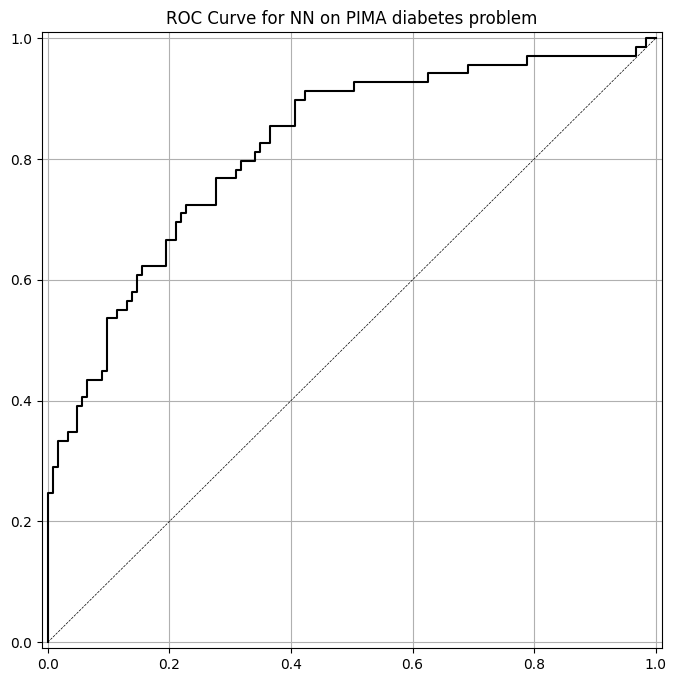

In [24]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [25]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

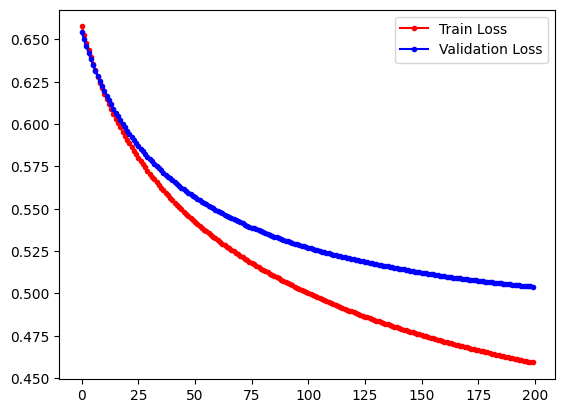

In [26]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

This plot shows that the train and validation starts in a close line but after 75 the loss have a huge gap

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [27]:
model1  = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.003)

model1.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [30]:
history = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1500,
    batch_size=32,
    verbose=0
)

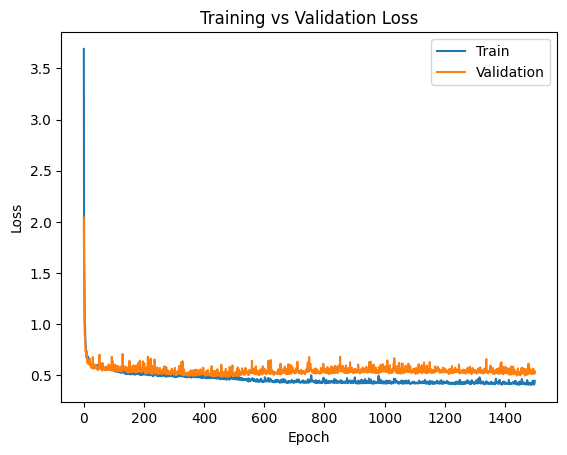

In [31]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(["Train", "Validation"])
plt.show()

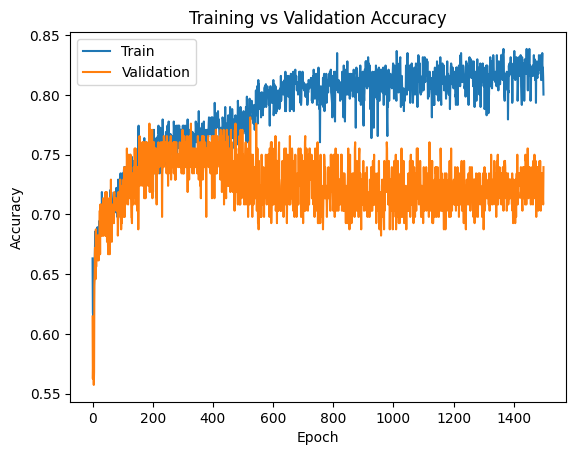

In [32]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


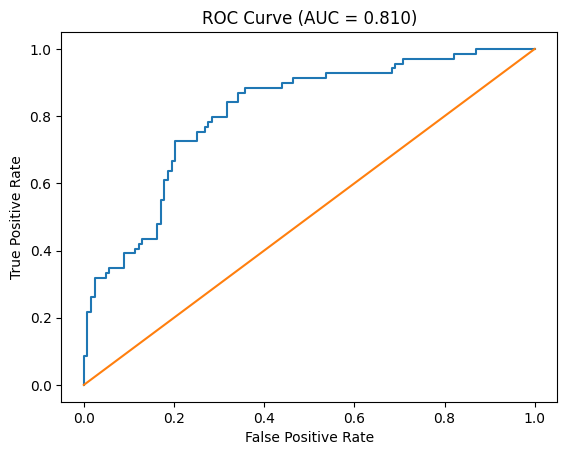

In [33]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model1.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()

In [34]:
configs = [
    {"lr": 0.001, "epochs": 500, "layers": [6, 6]},
    {"lr": 0.003, "epochs": 1000, "layers": [6, 6]},
    {"lr": 0.01,  "epochs": 1000, "layers": [8, 8]}
]

histories = []

for cfg in configs:
    model = Sequential()
    model.add(Dense(cfg["layers"][0], input_shape=(8,), activation="relu"))
    for units in cfg["layers"][1:]:
        model.add(Dense(units, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=Adam(learning_rate=cfg["lr"]),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    h = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=cfg["epochs"],
        batch_size=32,
        verbose=0
    )

    histories.append((cfg, h))

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


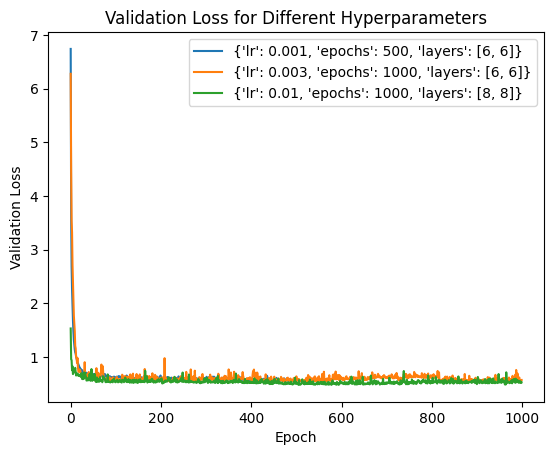

In [35]:
plt.figure()
for cfg, h in histories:
    plt.plot(h.history["val_loss"], label=str(cfg))

plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss for Different Hyperparameters")
plt.legend()
plt.show()


A two hidden layer model with six neurons in each layer as the baseline presented good learning and generalization performance. The use of lower learning rates made the convergence slower, but more stable, while the use of higher learning rates led to faster training but uneven validation loss was the downside of it. The increase in the number of neurons led to a slight improvement in the accuracy of the training process but the risk of overfitting was also increased which showed that it was necessary to balance network complexity with the performance of generalization.

#### Conclusion

Neural network was trained using the Pima Indians Diabetes dataset, had a good capacity of learning and generalizing to new data when the right architecture as well as a suitable learning rate are used. The results said that the learning rates with lower values led to the more stable convergence, while the ones with higher values resulted in the faster training but at the cost of the fluctuations in the validation loss. The training accuracy was marginally improved by increasing the number of neurons, but the overfitting risk was also raised, thus, the necessity of finding the sweet spot between complexity and generalization of the model was underscored.